In [ ]:
# First let's import os package to make sure that Python is 
#looking to the same dir where we're locally storing the "country_club DB":
import os
os.getcwd()

In [2]:
# Changing the directory:
os.chdir(r"path/SQLFiles Tier 2")

In [ ]:
#Confirm the directory:
os.getcwd()

In [4]:
# check the dB:
os.listdir()

['.ipynb_checkpoints',
 'README.md',
 'sqlite_db_pythonsqlite.db',
 'SQLTasks Tier 2.sql']

In [6]:
'''
There are many packages we could use to access an SQLite database such as sqlite3 and SQLAlchemy. 
At this time, We'll use SQLAlchemy as it works with many other Relational Database Management Systems, such as PostgresSQL and MySQL.
'''

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#let's fire up an SQL engine that will communicate our queries to the database:
engine = create_engine('sqlite:///sqlite_db_pythonsqlite.db')

#.table_names() method will help us to find out all the tables exist under sqlite_db_pythonsqlite DB
table_names = engine.table_names()

print(table_names)

In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

['Bookings', 'Facilities', 'Members']


In [7]:
members = pd.read_sql_query("SELECT * FROM Members", engine)
bookings = pd.read_sql_query("SELECT * FROM Bookings", engine)
facilities = pd.read_sql_query("SELECT * FROM Facilities", engine)

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
members.head()
facilities.head()
bookings.head()

,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00
1,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,,2012-07-02 12:02:05
2,2,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,,2012-07-02 12:08:23
3,3,Rownam,Tim,"23 Highway Way, Boston",23423,(844) 693-0723,,2012-07-03 09:32:15
4,4,Joplette,Janice,"20 Crossing Road, New York",234,(833) 942-4710,1,2012-07-03 10:25:05


,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200
1,1,Tennis Court 2,5.0,25.0,8000,200
2,2,Badminton Court,0.0,15.5,4000,50
3,3,Table Tennis,0.0,5.0,320,10
4,4,Massage Room 1,9.9,80.0,4000,3000


,bookid,facid,memid,starttime,slots
0,0,3,1,2012-07-03 11:00:00,2
1,1,4,1,2012-07-03 08:00:00,2
2,2,6,0,2012-07-03 18:00:00,2
3,3,7,1,2012-07-03 19:00:00,2
4,4,8,1,2012-07-03 10:00:00,1


### Q10: Produce a list of facilities with a total revenue less than 1000.The output of facility name and total revenue, sorted by revenue. Remember that there's a different cost for guests and members!

In [10]:
query = """
SELECT 
    sub2.name AS Facility, 
    sub2.totalrevenue AS Total_Revenue 
FROM 
    (
      SELECT 
          sub1.facilityname AS name, 
          SUM(sub1.revenue) AS totalrevenue 
      FROM 
          (
            SELECT 
                b.bookid, 
                f.name AS facilityname, 
                CASE WHEN b.memid = 0 THEN (b.slots * f.guestcost) 
                     ELSE b.slots * f.membercost END AS Revenue 
            FROM Bookings AS b 
            LEFT JOIN Members AS m 
                ON m.memid = b.memid 
            LEFT JOIN Facilities AS f 
                ON f.facid = b.facid) AS sub1 
      GROUP BY sub1.facilityname) AS sub2 
GROUP BY Facility 
HAVING Total_Revenue < 1000 
ORDER BY Total_Revenue DESC;
"""
total_revenue = pd.read_sql_query(query, engine)
total_revenue

,Facility,Total_Revenue
0,Pool Table,270
1,Snooker Table,240
2,Table Tennis,180


Text(0.5, 1.0, 'Facility with Total_Revenue < 1000')

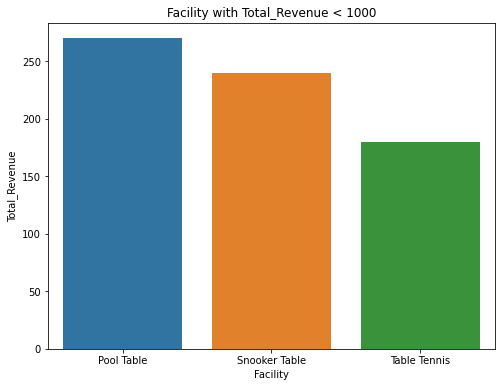

In [11]:
# Now let's Visualize the Facility with Total_Revenue < 1000:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.barplot(x=total_revenue['Facility'], y=total_revenue['Total_Revenue'], data=total_revenue)
ax.set_title('Facility with Total_Revenue < 1000')


### Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order

In [12]:
members.head()

,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00
1,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,,2012-07-02 12:02:05
2,2,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,,2012-07-02 12:08:23
3,3,Rownam,Tim,"23 Highway Way, Boston",23423,(844) 693-0723,,2012-07-03 09:32:15
4,4,Joplette,Janice,"20 Crossing Road, New York",234,(833) 942-4710,1,2012-07-03 10:25:05


In [13]:
query = """
SELECT 
    sub2.memberName AS Member, 
    sub2.recommender_first || ', ' || sub2.recommender_last AS Recommendedby 
FROM 
    (
      SELECT 
          sub1.memberName AS memberName, 
          sub1.recommenderId AS memberId, 
          m.firstname AS recommender_first, 
          m.surname AS recommender_last 
      FROM 
          (
            SELECT 
                m2.memid AS memberId, 
                m1.firstname || ', ' || m1.surname AS memberName, 
                m2.recommendedby AS recommenderId 
            FROM Members AS m1 
            INNER JOIN Members AS m2 
                ON m1.memid = m2.memid 
            WHERE (
                m2.recommendedby >= 1 
                  ) 
                  AND m1.memid >= 1) AS sub1 
      LEFT JOIN Members AS m 
           ON sub1.recommenderId = m.memid 
      WHERE m.memid >= 1) AS sub2
ORDER BY sub2.recommender_last;
"""
pd.read_sql_query(query, engine)

,Member,Recommendedby
0,"Ramnaresh, Sarwin","Florence, Bader"
1,"Joan, Coplin","Timothy, Baker"
2,"Matthew, Genting","Gerald, Butters"
3,"Timothy, Baker","Jemima, Farrell"
4,"David, Pinker","Jemima, Farrell"
5,"Henrietta, Rumney","Matthew, Genting"
6,"Douglas, Jones","David, Jones"
7,"Nancy, Dare","Janice, Joplette"
8,"David, Jones","Janice, Joplette"
9,"John, Hunt","Millicent, Purview"


### Q12: Find the facilities with their usage by member, but not guests.

In [14]:
members.head(2)
facilities.head(2)
bookings.head(2)

,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00
1,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,,2012-07-02 12:02:05


,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200
1,1,Tennis Court 2,5.0,25.0,8000,200


,bookid,facid,memid,starttime,slots
0,0,3,1,2012-07-03 11:00:00,2
1,1,4,1,2012-07-03 08:00:00,2


In [15]:
query = """
SELECT 
    f.name AS Facility, 
    SUM(b.slots) AS Usage 
FROM Bookings AS b 
LEFT JOIN Facilities AS f 
    ON f.facid = b.facid 
LEFT JOIN Members AS m 
    ON m.memid = b.memid 
WHERE b.memid != 0
GROUP BY Facility 
ORDER BY Usage DESC;
"""
usage_member = pd.read_sql_query(query, engine)
usage_member

,Facility,Usage
0,Badminton Court,1086
1,Tennis Court 1,957
2,Massage Room 1,884
3,Tennis Court 2,882
4,Snooker Table,860
5,Pool Table,856
6,Table Tennis,794
7,Squash Court,418
8,Massage Room 2,54


Text(0.5, 1.0, 'Facility Usage Per Member')

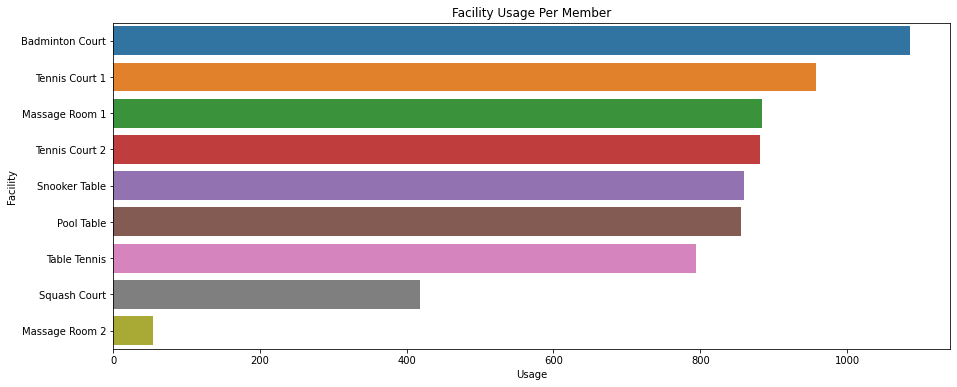

In [16]:
# Visualizing the Facility usage per Member:
f, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(y=usage_member['Facility'], x=usage_member['Usage'], data=usage_member)
ax.set_title('Facility Usage Per Member')


### Q13: Find the facilities usage by month, but not guests

In [17]:
query = """
SELECT 
    sub.MONTH AS Month, 
    sub.facilityname AS Facility, 
    SUM(sub.slotNumber) AS Usage 
FROM 
    (
      SELECT 
          strftime('%m', starttime) AS MONTH, 
          f.name AS facilityname, 
          b.slots AS slotNumber 
      FROM Bookings AS b 
      LEFT JOIN Facilities AS f 
          ON f.facid = b.facid 
      LEFT JOIN Members AS m 
          ON m.memid = b.memid 
      WHERE b.memid <> 0) sub 
GROUP BY Month, Facility 
ORDER BY Month, Usage DESC;
"""
usage_month = pd.read_sql_query(query, engine)
usage_month

,Month,Facility,Usage
0,07,Tennis Court 1,201
1,07,Massage Room 1,166
2,07,Badminton Court,165
3,07,Snooker Table,140
4,07,Tennis Court 2,123
5,07,Pool Table,110
6,07,Table Tennis,98
7,07,Squash Court,50
8,07,Massage Room 2,8
9,08,Badminton Court,414


Text(0.5, 1.0, 'Facility Usage Per Month')

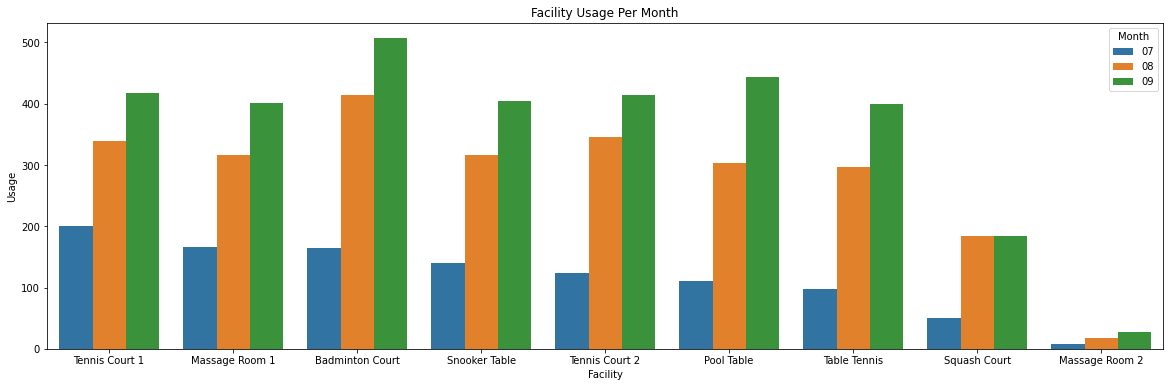

In [18]:
# Visualizing the Facility usage per Month:
f, ax = plt.subplots(figsize = (20,6))
ax = sns.barplot(x=usage_month['Facility'], y=usage_month['Usage'], hue = usage_month['Month'], data=usage_month)
ax.set_title('Facility Usage Per Month')
#ax.set_xlabel('Facility', fontsize=15)
#ax.set_ylabel('Usage', fontsize=15)
